# [Getting Started with a Movie Recommendation System](https://www.kaggle.com/ibtesama/getting-started-with-a-movie-recommendation-system)
* Data Set 1 : [The Movies Dataset](https://www.kaggle.com/rounakbanik/the-movies-dataset)
    * These files contain metadata for all 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters, release dates, languages, production companies, countries, TMDB vote counts and vote averages. This dataset also has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5 and have been obtained from the official GroupLens website.
    * ```kaggle datasets download -d rounakbanik/the-movies-dataset```
* Data Set 2 : [TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)
    * ```kaggle datasets download -d tmdb/tmdb-movie-metadata```

## 추천 시스템의 시대
  데이터 수집의 성장으로 새로운 정보화 시대가 열렸다. 데이터를 보다 효율적인 시스템을 만드는데 사용되며 대표적으로 추천 시스템이 있다. 추천 시스템은 inforamtion filtering system의 하나이며 검색 결과의 퀄리티를 향상시키며 검색한 아이템과 더 관련이 있거나 사용자의 검색 기록과 연관된 아이템들을 제공해준다.
  
  추천 시스템은 사용자에게 아이템을 제공했을때 rating 또는 선호도를 예측하는데 사용된다. 대부분의 회사들이 적용하고 있으며 아마존의 경우 고객들에게 상품을 제안하며, youtube는 다음 자동 재생할 video를 페이스북은 좋아할 만 한 페이지, 팔로우할 만 한 사람을 추천한다. 또한, 넷플릭스와 Spotify의 경우 추천엔진의 효율성에 크게 의존하고 있다.
  
![netflix](https://i.kinja-img.com/gawker-media/image/upload/s--e3_2HgIC--/c_scale,f_auto,fl_progressive,q_80,w_800/1259003599478673704.jpg)

해당 커널은 TMDB 5000 Movie Dataset을 이용하여 영화 추천시스템을 만든다. 

## 3가지 추천시스템
* Demographic Filtering (인구 통계학 기반 필터링)
    * 영화의 인기도, 장르 기반으로 모든 사용자에게 일반화 된 추천을 제공함.
    * 유사한 인구학적 통계(나이,성별 등..) 사용자에게 같은 영화가 추천됨.
    * 각 사용자마다 성향이 다르기 때문에 해당 접근법은 너무 단순함.
    * 인기가 많고 호평받는 영화가 일반 시청자가 좋아할 가능성이 더 높음.
* Content Base Filtering (컨텐츠 기반 필터링)
    * 특정 아이템을 기반으로 비슷한 아이템을 추천함.
    * 아이템의 메타데이터(장르, 감독, 요약, 배우 등...)를 사용함
    * 특정 아이템을 본 사람은 비슷한 아이템을 좋아할 가능성이 더 큼.
* Collaborative Filtering (협업 필터링)
   * 비슷한 관심사를 가지는 사람을 찾아 그 사람이 본 다른 컨텐츠를 추천
   * 메타데이터가 필요하지 않음!
   

In [2]:
import pandas as pd
import numpy as np
df1=pd.read_csv('../../data/tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
df2=pd.read_csv('../../data/tmdb-5000-movie-dataset/tmdb_5000_movies.csv')

* df1의 각 feature
    * movie_id : 각 영화가 가지는 고유 키
    * title : 영화 제목
    * cast : 주연, 조연 이름
    * crew : 감독, 작곡가, 편집, 작가 등의 정보
* df2의 각 feature
    * budget : 예산
    * genre : 액션/코미디/스릴러 등의 장르
    * homepage : 영화 홈페이지 링크
    * id : 영화 고유키 (df1의 movie_id)
    * keywords : 영화와 관련된 키워드 및 태그
    * original_language : 원본 영화 언어
    * original_title : 원본 영화 제목
    * overview : 요약
    * popularity : 영화 인기도
    * production_companies : 제작사
    * production_countries : 제작 국가
    * release_date : 개봉일
    * revenue : 영화 수익
    * runtime : 러닝 타임 (분)
    * status : release or remored
    * tagline : 영화 태그라인
    * title : 영화 제목
    * vote_average : 평균 평점
    * vote_count : 투표수

In [3]:
df1.columns = ['id','title2','cast','crew']
df2 = df2.merge(df1,on='id')

In [4]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,title2,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


## Demographic Filtering
* 영화에 점수를 매기거나 평가하는 척도가 필요함.
* 모든 영화의 점수를 계산함.
* 점수가 높은 영화순으로 사용자에게 추천함.
* 점수 계산
    * 영화의 평균 점수를 사용하는건 공평하지 않음.
    * 예) 하나의 영화는 3명이 투표하고 8.9를 받음. 다른 영화는 40명이 투표하고 7.8을 받음. (3명은 투표에 충분한 모수가 아님.)
    * IMDB's weighted rating (wr)![](https://image.ibb.co/jYWZp9/wr.png)
        * v: 투표 수
        * m : 최소 투표 수 (차트 진입을 위한 최소 투표 수)
        * R : 평균 점수
        * C : 전체 평균 (모든 영화의 평균)

In [5]:
C = df2['vote_average'].mean()
C

6.092171559442011

평균적으로 10점 만점에 6점을 받음. m은 90th percentile의 수치로 정하였음.

In [6]:
m = df2['vote_count'].quantile(0.9)
m

1838.4000000000015

vote_count가 m보다 작은경우는 제외시킨다!

In [7]:
q_movies = df2.copy().loc[df2['vote_count']>=m]
print(q_movies.shape,df2.shape)

(481, 23) (4803, 23)


전체 4803개 영화중 481개가 선택됨.

이제 weighted_rating() 함수를 구현하여 각 영화별로 점수를 구한다.

In [8]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m)*R) + (m/(v+m) * C)

In [9]:
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [10]:
q_movies = q_movies.sort_values('score',ascending=False)
q_movies[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


간단하게 영화의 평점을 기준으로 추천시스템을 만들어 봤다.

평점 외에도 아래와 같이 인기도를 통해서도 가능하다.

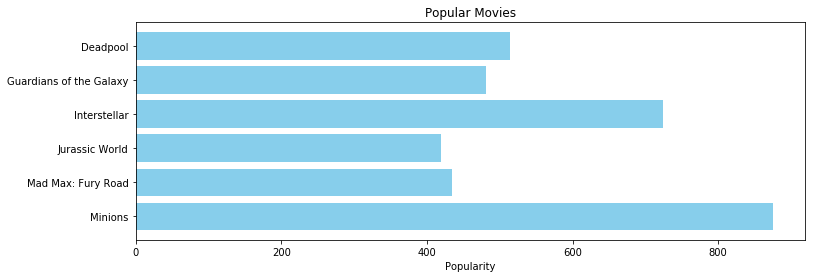

In [11]:
pop = df2.sort_values('popularity',ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6),align='center',
         color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

인구 통계 기반 추천은 모든 사용자에게 일괄적인 차트를 제공함. 따라서 특정 사용자의 관심과 취향에 민감하지 않음.

## Content Based Filtering
영화의 특징(요약, 주연, 키워드 등..)을 사용하여 비슷한 다른 영화를 찾아 추천하는 방식

![](https://image.ibb.co/f6mDXU/conten.png)

### 요약 구성을 이용한 추천
영화의 요약을 기반으로 모든 영화의 유사도 쌍을 계산하여 추천에 사용함. 

In [12]:
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

각 overview를 단어벡터로 변환해야함. 여기서는 Term Frequency-Inverse Documnet Frequency(TF-IDF) 벡터로 계산하여 사용함.
* Term Frequency
    * 문서에서 단어의 상대 빈도이며 (term instance/total instance)로 계산.
* Inverse Document Frequency
    * 해당 단어가 들어있는 문서의 상대 빈도이며 ( 전체 문서 수 / 단어가 들어있는 문서)
* 각 단어의 중요도는 TF * IDF으로 구함.

문서전체에서 한번이라도 나온 단어 각각을 컬럼으로하는 matrix가 만들어지며 영화별로 해당 컬럼들을 가진다. 해당 matrix를 이용하여 최종 유사성 점수를 계산함.

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

4803개의 영화에서 약 20,000 개의 단어를 발견함.

유사도는 유클리디언, 피어슨, 코사인 유사도등을 통해 구할수 있으며, 경우에 따라 선택하여 사용해야 함.

여기서는 코사인 유사도를 이용하여 영화간 유사도를 계산함. 코사인 유사도는 크기와 독립적으로 계산가능하여 쉽고 빠름.

![](https://cdn-images-1.medium.com/max/800/0*9-Ici8-IQ2Dz1_SW)

우리는 TF-IDF vectorizer를 이용하기 때문에 dot product를 바로 가능함. 따라서, cosine_similarities() 대신 sklearn의 linear_kernal을 사용할 것!

In [14]:
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

영화 제목을 입력하여 가장 비슷한 영화 10개를 출력하는 함수를 정의함. 이러기 위해서는 title을 dataframe의 index로 지정해야함.

In [15]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

추천 시스템은 다음과 같이 움직인다
* 주어진 영화의 index를 가져온다.
* 해당 영화와 모든 영화간의 코사인 유사도를 구하고 (movie_idx,score)로 리턴.
* score를 중심으로 sorting 한다.
* 상위 10개를 뽑는다 ( top1은 제외한다. 같은 영화)
* 해당 영화의 title을 리턴.

In [16]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # get index
    idx = indices[title]
    
    # get pair(idx, score)
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # sorted by score
    sim_scores = sorted(sim_scores,key = lambda x:x[1], reverse=True)
    
    # get top10 idx
    sim_scores = sim_scores[1:11]
    
    # get movies
    movie_indices = [i[0] for i in sim_scores]
    
    return df2['title'].iloc[movie_indices]

In [19]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [20]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

위의 결과들이 유사한 요약을 가지는 영화는 잘 찾았으나, 추천의 품질로는 좋지 않음. "The Dark Knight Rises"는 모든 배트맨 영화를 반환하지만 해당 영화를 본 사람들은 다른 Christopher Nolan의 영화를 더 좋아할 수도 있다. 현재 시스템에서는 부족하다.

### Credits, Genres and Keywords을 이용한 추천
더 나은 메타 데이터를 사용하면 추천의 질이 향상 될 수 있다. 3명의 배우, 감독, 장르, 영화 키워드를 기반으로 추천 시스템을 만들어보자

In [21]:
# Parse the stringfied features into their corresponding python objects
from ast import literal_eval
features = ['cast','crew','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [22]:
df2["cast"].head(5)

0    [{'cast_id': 242, 'character': 'Jake Sully', '...
1    [{'cast_id': 4, 'character': 'Captain Jack Spa...
2    [{'cast_id': 1, 'character': 'James Bond', 'cr...
3    [{'cast_id': 2, 'character': 'Bruce Wayne / Ba...
4    [{'cast_id': 5, 'character': 'John Carter', 'c...
Name: cast, dtype: object

In [23]:
# Get director
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [24]:
# Get top 3 element or entires list
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in  x]
        if len(names) > 3:
            names = names[:3]
        return names
    return []

In [25]:
# add feature director, cast, genres and keywords
df2['director'] = df2['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [26]:
# print new features
df2[['title','cast','director','keywords','genres']].head(4)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"


생성한 feature를 vectorizer하기 전 하나의 text로 합쳐서 사용함!

In [28]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + str(x['director']) + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

앞에서 영화 요약을 통한 추천과 방법은 동일하다. 다만 TF-IDF대신 CountVectorizer()를 사용한다. 이는 상대적으로 더 많은 영화를 연기하거나 감독한 배우,감독에 대한 가중치를 낮추지 않기 위함. (TF-IDF는 빈번하게 나오는 단어에 대해서 가중치를 낮춤.)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [30]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [31]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,status,tagline,title,vote_average,vote_count,title2,cast,crew,director,soup
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron,culture clash future space war Sam Worthington...
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski,ocean drug abuse exotic island Johnny Depp Orl...
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes,spy based on novel secret agent Daniel Craig C...


In [32]:
# Reset index of our main Dataframe and construct reverse mapping as before
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [33]:
get_recommendations("The Dark Knight Rises", cosine_sim2)

119                Batman Begins
65               The Dark Knight
4638    Amidst the Devil's Wings
1196                The Prestige
2793        The Killer Inside Me
280               Public Enemies
1720                    Kick-Ass
1792                 Pain & Gain
1740                  Kick-Ass 2
3966                 Point Blank
Name: title, dtype: object

In [34]:
get_recommendations("The Godfather", cosine_sim2)

867     The Godfather: Part III
2731     The Godfather: Part II
1525             Apocalypse Now
2792        Glengarry Glen Ross
1209              The Rainmaker
3012              The Outsiders
4209           The Conversation
2649          The Son of No One
1018            The Cotton Club
4124         This Thing of Ours
Name: title, dtype: object

In [35]:
get_recommendations("The Avengers", cosine_sim2)

7                  Avengers: Age of Ultron
26              Captain America: Civil War
79                              Iron Man 2
174                    The Incredible Hulk
169     Captain America: The First Avenger
85     Captain America: The Winter Soldier
94                 Guardians of the Galaxy
31                              Iron Man 3
68                                Iron Man
33                   X-Men: The Last Stand
Name: title, dtype: object

메타데이터를 더 활용한 덕에 더 나은 추천을 보임. 마블이나 DC 코믹스 팬들의 경우 같은 제작사의 영화를 좋아함. production_company를 추가하여 반영할 수 있으며, 감독에게 가중치를 주고 싶으면 soup을 만들어줄 때 여러번 넣어주면 더 가중시킬 수 있음.
## Collaborative Filtering
콘텐츠 기반의 추천엔진은 특정 영화에 가까운 영화만 제안할 수 있다. 즉, 취향을 모아 여러 장르의 영화를 추천할 수 없다.또한, 해당 추천 시스템은 영화를 기반으로 한 추천이기 때문에 사용자는 상관없이 해당 영화에 대해 동일한 추천을 준다.

Collaborative Filtering을 사용하여 사용자에게 맞춤 추천 시스템을 만들어보자!
### User based filtering
* 유사한 사용자가 좋아하는 것을 추천함.
* 유사도는 피어슨 또는 코사인 유사도를 사용함.

아래의 matrix에서 각 행은 사용자 각 컬럼은 영화이며 값은 rating 이며, 유사도 컬럼은 Target User(E)와의 유사도 값이다.
![](https://cdn-images-1.medium.com/max/1000/1*9NBFo4AUQABKfoUOpE3F8Q.png)

User F의 경우 E와 겹치는 영화가 하나도 없기 때문에 피어슨 관계에서는 NA로 정의되지 않음.(User A의 유사도는 잘못 표기됨.)

우리는 User B,C,D를 피어슨 관계를 기반으로 유사도를 구한다!
![](https://cdn-images-1.medium.com/max/1000/1*jZIMJzKM1hKTFftHfcSxRw.png)

위의 결과로 D의 경우 E와 매우 다름을 알 수 있다. D의 경우 "Me Before You" 영화를 평균보다 높게 줬지만, E의 경우 반대이다.

이제 사용자 E가 보지 않은 영화를 다른 사용자의 평가 기반 및 유사도를 가지고 예상 평점을 계산한다
![](https://cdn-images-1.medium.com/max/1000/1*9TC6BrfxYttJwiATFAIFBg.png)

사용자 기반 Collaborative Filtering은 간단하지만 몇가지 문제를 가짐.
* 사용자 선호도는 시간이 지남에 따라 변함.
* 즉, 미리 연산해 놓은 Matrix를 사용하면 성능이 저하될 수 있음.

### Item Based Collaborative Filtering
* 사용자 간 유사성 대신 사용자가 평가한 영화와 유사한 기준으로 영화를 추천.
* 사용자 간 유사성을 구할 때 처럼 Pearson Correlation, Cosine Similarity를 사용하며, 사용자간의 연관 관계가 아닌 영화간 연관 관계를 구함.
* 사용자 기반에서 특정 사용자의 모든 영화에 대한 평점을 예측한 방식이 아닌 특정 영화의 모든 사용자의 평점을 예측함.

예) Target 영화를 좋아하는 사람은 1번 영화는 싫어하며 2번 영화도 싫어하며 3번 영화는 조금 좋아하며 4번 영화는 매우 좋아함.
![](https://cdn-images-1.medium.com/max/1000/1*LqFnWb-cm92HoMYBL840Ew.png)

아이템 기반 CF를 사용하면 동적(취향이 변하는) 사용자에 대한 문제는 해결됨. 다만 문제가 있음
* 확장성
    * m명의 사용자와 n개의 영화일 때, 복잡도가 최대 O(m\*n)으로 크다.
* Sparsity
    * 수백명의 사용자 중 1~2명만 특정 영화에 대한 평가를 한 경우 신뢰할 수 있는가?
    * 실제 1~2명이 특정 영화와 유사도 높게 평점을 줄 경우 모든 사용자에게 해당 영화의 유사도에 반영 됨.

### Single Value Decomposition (특이값 분해)
CF에서 확장성과 Sparsity를 해결하는 방법중 하나는 사용자와 아이템(영화)사이의 유사도를 나타내는 잠재적인 요인 모델을 발견한는 것! 

즉, 사용자의 아이템 평가를 기반으로 모델링하여 추천하는 방식( 추천->최적화 )
![](https://cdn-images-1.medium.com/max/800/1*GUw90kG2ltTd2k_iv3Vo0Q.png)

잠깐! 특이값 분해란? **차원축소 기법중 하나!**

* 차원축소 (Dimension Reduction) [참고](https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/)
    * 수많은 feature를 사용시 차원의 저주등에 빠지기 쉬움. 따라서, 차원축소 과정이 중요함.
    * 주성분 분석 (PCA)
        * 데이터의 분산을 최대한 보존하면서 서로 직교하는 축을 찾아 고차원에서 저차원 공간으로 변환하는 기법!
        * ![](http://i.imgur.com/jWJ2nUs.png)
    * 특이값 분해 (SVD)
        * m X n 크기의 데이터 행렬 A를 아래와 같이 분해 하는 것!
        * ![](http://i.imgur.com/lP44bGq.png)
        * thin SVD ![](http://i.imgur.com/NU5w7Uy.png)
        * compact SVD ![](http://i.imgur.com/2AXD5Fw.png)
        * truncated SVD ![](http://i.imgur.com/CHLt0DM.png)

[Surprise](https://surprise.readthedocs.io/en/stable/index.html) 라이브를 이용하여 [SVD](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)(특이값 분해)를 시행하자!


In [37]:
from surprise  import Reader, Dataset, SVD, evaluate
reader = Reader()
ratings = pd.read_csv('../../data/the-movies-dataset/ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [39]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
data.split(n_folds=5)

In [42]:
svd = SVD()
evaluate(svd, data, measures=['RMSE','MAE'])

/home/zumse/anaconda3/lib/python3.6/site-packages/surprise/evaluate.py:66: UserWarning: The evaluate() method is deprecated. Please use model_selection.cross_validate() instead.
  'model_selection.cross_validate() instead.', UserWarning)
/home/zumse/anaconda3/lib/python3.6/site-packages/surprise/dataset.py:193: UserWarning: Using data.split() or using load_from_folds() without using a CV iterator is now deprecated. 
  UserWarning)


Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
RMSE: 0.8924
MAE:  0.6864
------------
Fold 2
RMSE: 0.8894
MAE:  0.6863
------------
Fold 3
RMSE: 0.8970
MAE:  0.6913
------------
Fold 4
RMSE: 0.9004
MAE:  0.6942
------------
Fold 5
RMSE: 0.9073
MAE:  0.6947
------------
------------
Mean RMSE: 0.8973
Mean MAE : 0.6906
------------
------------


CaseInsensitiveDefaultDict(list,
                           {'mae': [0.68642143848073334,
                             0.68632340385761192,
                             0.69126163062810431,
                             0.69424940179373218,
                             0.69472224489187806],
                            'rmse': [0.89241812307340573,
                             0.88936333380401189,
                             0.89696884951726252,
                             0.9004332388586499,
                             0.90725718881581419]})

RMSE가 약 0.89가 나옴. 이제 데이터셋을 학습시키고 예측을 해보자!

In [43]:
trainset = data.build_full_trainset()
svd.fit(trainset)

사용자 ID 1번이 준 평점을 확인해보자!

In [44]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [50]:
svd.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.5258330988406792, details={'was_impossible': False})

UserID 1번 사용자의 302 영화에 대한 예상 평점은 2.5점이 나왔다.

이러한 추천방식은 영화의 정보는 필요하지 않는다. 영화 ID를 기반으로 동작하고 다른 사용자가 영화를 평가한 것을 바탕으로 평점을 예측한다. 메타데이터가 충분하지 않는 경우에 사용하면 좋을 것 같음.